# Data Analysis Using 2011 Census of India

# INTRODUCTION
The Census of India conducted every 10 year's. First census Started in 1871. The word 'Census' came in the Latin word 'Censere' and the 'Censere' meaning to assess. Or other word Census meaning 'an official count or survey, especially of a population'. Census is nothing but a process of collecting, analyzing, evaluating, publishing and discripting statistical data regarding the population.

In [1]:
import pandas as pd                 # used for data analysis.
import numpy as np                  # used to perform mathematical operations on arrays.
import matplotlib.pyplot as plt     # used to data visualization.
import seaborn as sns               # making statistical graphics in Python.
from tabulate import tabulate       # used to print tabular data in nicely formatted tables.

### LOADING THE DATA

In [2]:
data = pd.read_csv("Census.csv")

### Data Analysis

### SUMMARIZING THE DATASET

#### 1. Dimensions of the dataset

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [3]:
# shape
data.shape

(498, 7)

#### 2. Peek at the data

Let's eyeball our data to get a clearer picture.

In [4]:
# head
data

,Unnamed: 0,CITY,RANK,STATE,POPULATION,SEXRATIO,LITERACY
0,0,Mumbai,1,Maharashtra,12442373.0,853.0,89.73
1,1,Bangalore,3,Karnataka,8443675.0,923.0,88.71
2,2,Ahmedabad,5,Gujarat,5577940.0,898.0,88.29
3,3,Kolkata,7,West Bengal,4496694.0,908.0,86.31
4,4,Pune,9,Maharashtra,3124458.0,948.0,89.56
...,...,...,...,...,...,...,...
493,244,Bhadreswar,490,West Bengal,101477.0,903.0,86.51
494,245,Kasganj,492,Uttar Pradesh,101277.0,891.0,77.36
495,246,Gangtok,494,Sikkim,100286.0,912.0,89.33
496,247,Nagda,496,Madhya Pradesh,100039.0,947.0,80.71


#### 3. Statistical Summary

Now we can take a look at a summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles.

In [5]:
# descriptions
data.describe()

,Unnamed: 0,RANK,POPULATION,SEXRATIO,LITERACY
count,498.000000,498.000000,4.980000e+02,498.000000,498.000000
mean,124.000000,249.500000,4.498030e+05,932.903614,84.261004
std,71.951806,143.904482,1.029319e+06,55.392315,6.306394
min,0.000000,1.000000,9.891600e+04,709.000000,48.280000
25%,62.000000,125.250000,1.256420e+05,894.250000,80.945000
50%,124.000000,249.500000,1.841050e+05,925.000000,85.180000
75%,186.000000,373.750000,3.495960e+05,975.500000,88.612500
max,248.000000,498.000000,1.244237e+07,1093.000000,98.360000


#### 4. Class Distribution

Let’s now take a look at the number of instances districts that belong to each state. We can view this as an absolute count.

In [6]:
# class distribution
print(data.groupby('STATE').size())

STATE
Andaman and Nicobar Islands     1
Andhra Pradesh                 42
Assam                           4
Bihar                          26
Chandigarh                      1
Chhattisgarh                    9
Delhi                          15
Gujarat                        30
Haryana                        20
Himachal Pradesh                1
Jammu and Kashmir               3
Jharkhand                      10
Karnataka                      26
Kerala                          7
Madhya Pradesh                 32
Maharashtra                    44
Manipur                         1
Meghalaya                       1
Mizoram                         1
Nagaland                        1
Orissa                         10
Puducherry                      2
Punjab                         17
Rajasthan                      29
Sikkim                          1
Tamil Nadu                     32
Tripura                         1
Uttar Pradesh                  64
Uttarakhand                     6
West Ben

#### 5. Information about data

In [7]:
data.info()      #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   CITY        498 non-null    object 
 2   RANK        498 non-null    int64  
 3   STATE       498 non-null    object 
 4   POPULATION  498 non-null    float64
 5   SEXRATIO    498 non-null    float64
 6   LITERACY    498 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 27.4+ KB


#### 6.Length of the data

In [8]:
len(data)

498

### Data Cleaning

In [9]:
data.drop("Unnamed: 0", inplace=True, axis=1)

In [10]:
data["FEMALE"] = (data["POPULATION"] *((data["SEXRATIO"]/1000)/(1+(data["SEXRATIO"]/1000))))
data["FEMALE"]=data["FEMALE"].astype("int")
data["MALE"]=data["POPULATION"]-data["FEMALE"]

In [11]:
data.head(5)

,CITY,RANK,STATE,POPULATION,SEXRATIO,LITERACY,FEMALE,MALE
0,Mumbai,1,Maharashtra,12442373.0,853.0,89.73,5727654,6714719.0
1,Bangalore,3,Karnataka,8443675.0,923.0,88.71,4052788,4390887.0
2,Ahmedabad,5,Gujarat,5577940.0,898.0,88.29,2639088,2938852.0
3,Kolkata,7,West Bengal,4496694.0,908.0,86.31,2139936,2356758.0
4,Pune,9,Maharashtra,3124458.0,948.0,89.56,1520526,1603932.0


### Data Visualization

### 1.Total number of cites as per state

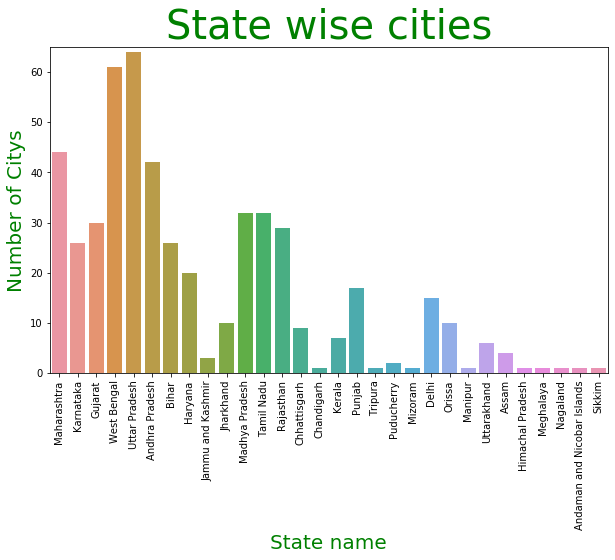

In [12]:

plt.figure(figsize=(10,6))
sns.countplot(x='STATE', data=data)
plt.title("State wise cities", size= 40,color='green')
plt.ylabel('Number of Citys',size=20,color='green')
plt.xlabel("State name",size=20,color='green')
plt.xticks(rotation = 90)
plt.ylim(0,65)
plt.show()

### 2.Population wise highest rank city in India.

In [13]:
df = data.sort_values(["POPULATION"], ascending=False)
c = df[{"CITY","RANK","POPULATION"}].iloc[0:5]
c=c.reset_index(drop=True)
print(tabulate(c, headers = 'keys', tablefmt = 'pretty'))

+---+------------+-----------+------+
|   | POPULATION |   CITY    | RANK |
+---+------------+-----------+------+
| 0 | 12442373.0 |  Mumbai   |  1   |
| 1 | 11034555.0 |   Delhi   |  2   |
| 2 | 8443675.0  | Bangalore |  3   |
| 3 | 6731790.0  | Hyderabad |  4   |
| 4 | 5577940.0  | Ahmedabad |  5   |
+---+------------+-----------+------+


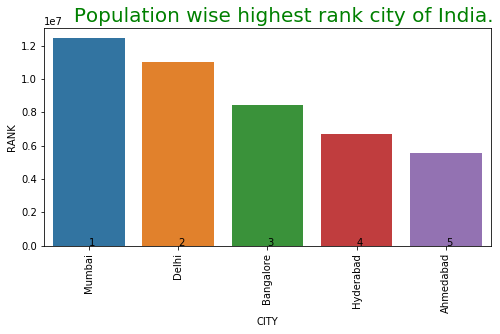

In [14]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
if __name__ == '__main__':
    x = c["CITY"]
    y = c["RANK"]
    plt.figure(figsize=(8,4))
    sns.barplot(x="CITY" , y = "POPULATION" ,data=c)
    plt.xticks(rotation = 90)
    addlabels(x, y)
    plt.title("     Population wise highest rank city of India.", size= 20,color = "green")
    plt.xlabel("CITY")
    plt.ylabel("RANK")
    plt.show()

### 3. population wise least  city in India.

In [15]:
df = data.sort_values(["POPULATION"], ascending=True)
a = df[{"CITY","RANK","POPULATION"}].iloc[0:5]
a=a.reset_index(drop=True)
print(tabulate(a, headers = 'keys', tablefmt = 'pretty'))

+---+------------+------------+------+
|   | POPULATION |    CITY    | RANK |
+---+------------+------------+------+
| 0 |  98916.0   | Kapurthala | 498  |
| 1 |  99969.0   |  Banswara  | 497  |
| 2 |  100039.0  |   Nagda    | 496  |
| 3 |  100284.0  |   Datia    | 495  |
| 4 |  100286.0  |  Gangtok   | 494  |
+---+------------+------------+------+


In [16]:
temp = a.groupby('CITY').sum()
count = a["CITY"].value_counts()
count= count.reindex(sorted(count.index))
#print(count)
density =temp['POPULATION']/count.values/10**5

([<matplotlib.patches.Wedge at 0x1de03438288>,
 [Text(0.8896331450825713, 0.6469566192338501, 'Banswara'),
  Text(-0.3433751858192357, 1.0450327658803842, 'Datia'),
  Text(-1.099963344561187, -0.00898001234788025, 'Gangtok'),
  Text(-0.33529390463068076, -1.0476535675105165, 'Kapurthala'),
  Text(0.8893480350911449, -0.6473484938420108, 'Nagda')])

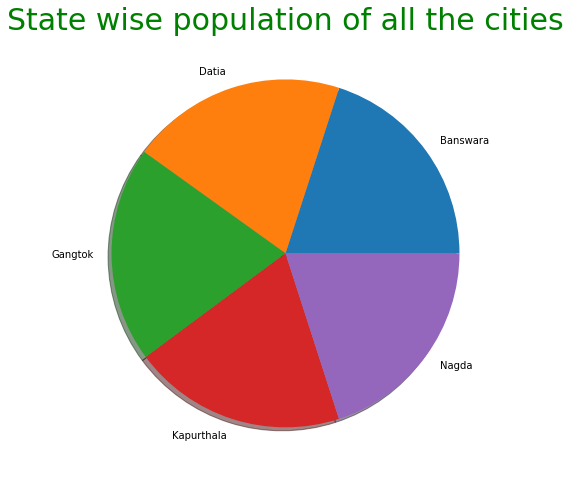

In [17]:
plt.figure(figsize=(8,8))
plt.title("State wise population of all the cities", size= 30,color = "green")
plt.pie(density.values,labels=density.index, shadow=True)

### 4. Check highest population  city in India

In [18]:
df = data.sort_values(["POPULATION"], ascending=False)
c = df[{"CITY","POPULATION"}].iloc[0:5]
c=c.reset_index(drop=True)
print(tabulate(c, headers = 'keys', tablefmt = 'pretty'))

+---+------------+-----------+
|   | POPULATION |   CITY    |
+---+------------+-----------+
| 0 | 12442373.0 |  Mumbai   |
| 1 | 11034555.0 |   Delhi   |
| 2 | 8443675.0  | Bangalore |
| 3 | 6731790.0  | Hyderabad |
| 4 | 5577940.0  | Ahmedabad |
+---+------------+-----------+


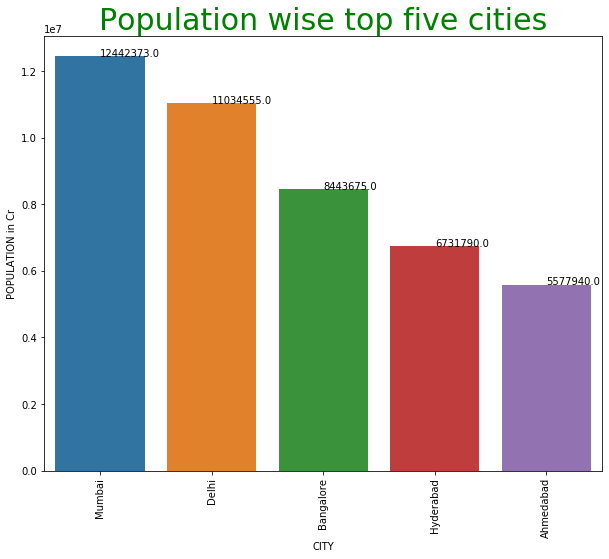

In [19]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
if __name__ == '__main__':
    x = c["CITY"]
    y = c["POPULATION"]
    plt.figure(figsize=(10,8))
    sns.barplot(x="CITY" , y = "POPULATION" ,data=c)
    plt.xticks(rotation = 90)
    addlabels(x, y)
    plt.title("Population wise top five cities", size= 30,color = "green")
    plt.xlabel("CITY")
    plt.ylabel("POPULATION in Cr")
    plt.show()

### 5.Check lowest population city in India.

In [20]:
df = data.sort_values(["POPULATION"], ascending=True)
c = df[{"CITY","POPULATION"}].iloc[0:5]
c=c.reset_index(drop=True)
print(tabulate(c, headers = 'keys', tablefmt = 'pretty'))

+---+------------+------------+
|   | POPULATION |    CITY    |
+---+------------+------------+
| 0 |  98916.0   | Kapurthala |
| 1 |  99969.0   |  Banswara  |
| 2 |  100039.0  |   Nagda    |
| 3 |  100284.0  |   Datia    |
| 4 |  100286.0  |  Gangtok   |
+---+------------+------------+


### 6.Check highest LITERACY city in India.

In [21]:
df = data.sort_values(["LITERACY"], ascending=False)
c = df[{"CITY","LITERACY"}].iloc[0:10]
c=c.reset_index(drop=True)
#print(tabulate(c, headers = 'keys', tablefmt = 'pretty'))

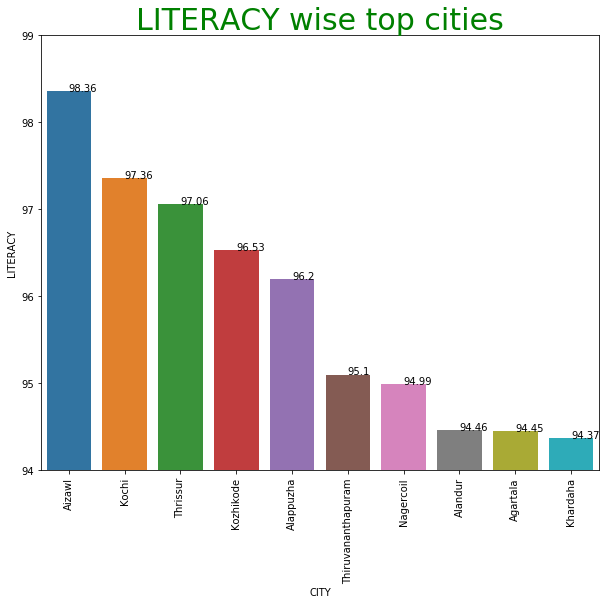

In [22]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
if __name__ == '__main__':
    x = c["CITY"]
    y = c["LITERACY"]
    plt.figure(figsize=(10,8))
    sns.barplot(x="CITY" , y = "LITERACY" ,data=c)
    plt.xticks(rotation = 90)
    addlabels(x, y)
    plt.title("LITERACY wise top cities", size= 30,color = "green")
    plt.ylim(94,99)
    plt.xlabel("CITY")
    plt.ylabel("LITERACY")
    plt.show()

### 7.Check lowest  LITERACY city in India.

In [23]:
df = data.sort_values(["LITERACY"], ascending=True)
c = df[{"CITY","LITERACY"}].iloc[0:5]
c=c.reset_index(drop=True)
print(tabulate(c, headers = 'keys', tablefmt = 'pretty'))

+---+---------+----------+
|   |  CITY   | LITERACY |
+---+---------+----------+
| 0 | Sambhal |  48.28   |
| 1 | Rampur  |  59.47   |
| 2 | Bagaha  |  59.84   |
| 3 | Amroha  |  62.36   |
| 4 | Khurja  |  65.61   |
+---+---------+----------+


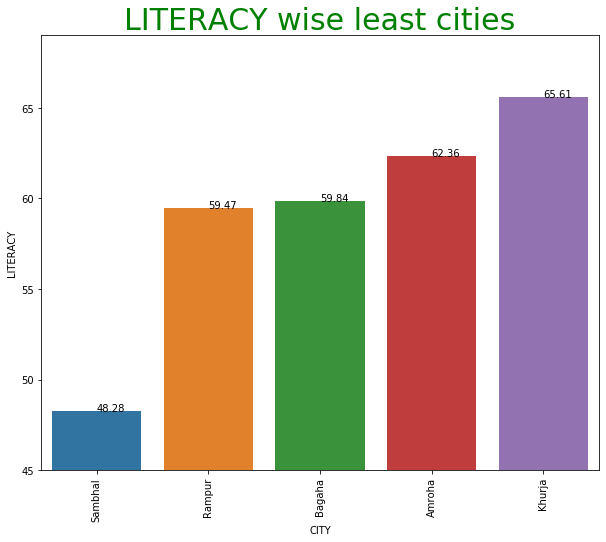

In [25]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
if __name__ == '__main__':
    x = c["CITY"]
    y = c["LITERACY"]
    plt.figure(figsize=(10,8))
    sns.barplot(x="CITY" , y = "LITERACY" ,data=c)
    plt.xticks(rotation = 90)
    addlabels(x, y)
    plt.title("LITERACY wise least cities", size= 30,color = "green")
    plt.ylim(45,69)
    plt.xlabel("CITY")
    plt.ylabel("LITERACY")
    plt.show()

### 8.Check highest  female quantity  city in India.

In [26]:
df = data.sort_values(["FEMALE"], ascending=False)
c = df[{"CITY","FEMALE"}].iloc[0:10]
c=c.reset_index(drop=True)
print(tabulate(c, headers = 'keys', tablefmt = 'pretty'))

+---+-----------+---------+
|   |   CITY    | FEMALE  |
+---+-----------+---------+
| 0 |  Mumbai   | 5727654 |
| 1 |   Delhi   | 5152596 |
| 2 | Bangalore | 4052788 |
| 3 | Hyderabad | 3288419 |
| 4 | Ahmedabad | 2639088 |
| 5 |  Chennai  | 2310516 |
| 6 |  Kolkata  | 2139936 |
| 7 |   Surat   | 1923493 |
| 8 |   Pune    | 1520526 |
| 9 |  Jaipur   | 1442919 |
+---+-----------+---------+


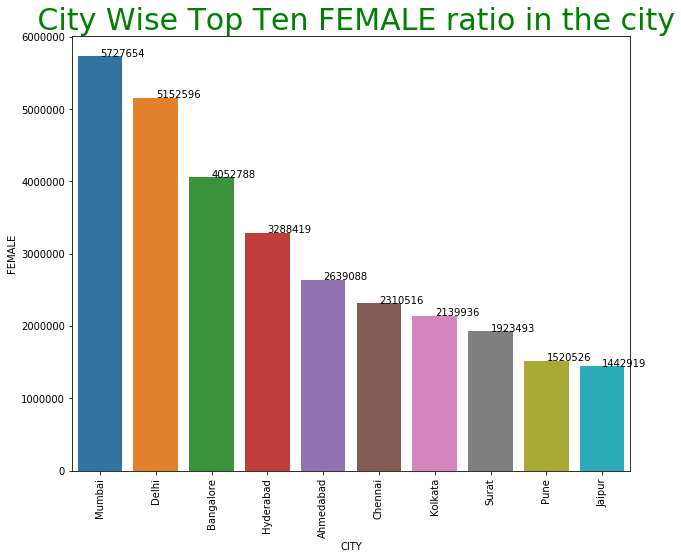

In [27]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
if __name__ == '__main__':
    x = c["CITY"]
    y = c["FEMALE"]
    plt.figure(figsize=(10,8))
    sns.barplot(x="CITY" , y = "FEMALE" ,data=c)
    addlabels(x, y)
    plt.title(" City Wise Top Ten FEMALE ratio in the city", size= 30,color = "green")
    plt.xlabel("CITY")
    plt.ylabel("FEMALE")
    plt.xticks(rotation = 90)
    plt.show()

### 9.Check highest male quantity city in India.

In [28]:
df = data.sort_values(["MALE"], ascending=False)
c = df[{"CITY","MALE","STATE"}].iloc[0:10]
c=c.reset_index(drop=True)
print(tabulate(c, headers = 'keys', tablefmt = 'pretty'))

+---+----------------+-----------+-----------+
|   |     STATE      |   CITY    |   MALE    |
+---+----------------+-----------+-----------+
| 0 |  Maharashtra   |  Mumbai   | 6714719.0 |
| 1 |     Delhi      |   Delhi   | 5881959.0 |
| 2 |   Karnataka    | Bangalore | 4390887.0 |
| 3 | Andhra Pradesh | Hyderabad | 3443371.0 |
| 4 |    Gujarat     | Ahmedabad | 2938852.0 |
| 5 |    Gujarat     |   Surat   | 2544304.0 |
| 6 |  West Bengal   |  Kolkata  | 2356758.0 |
| 7 |   Tamil Nadu   |  Chennai  | 2336216.0 |
| 8 |  Maharashtra   |   Pune    | 1603932.0 |
| 9 |   Rajasthan    |  Jaipur   | 1603244.0 |
+---+----------------+-----------+-----------+


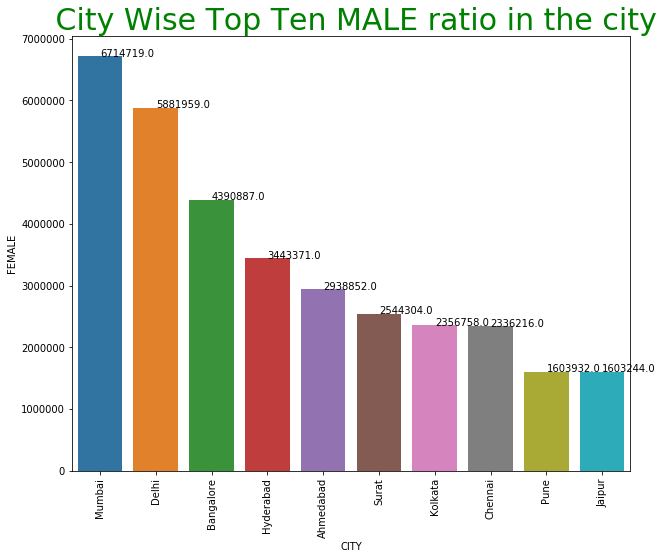

In [29]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
if __name__ == '__main__':
    x = c["CITY"]
    y = c["MALE"]
    plt.figure(figsize=(10,8))
    sns.barplot(x="CITY" , y = "MALE" ,data=c)
    addlabels(x, y)
    plt.title(" City Wise Top Ten MALE ratio in the city", size= 30,color = "green")
    plt.xlabel("CITY")
    plt.ylabel("FEMALE")
    plt.xticks(rotation = 90)
    plt.show()

### 10.Compare the amount of men and women in the city.

In [30]:
df = data.sort_values(["POPULATION"], ascending=False)
c = df[{"STATE","CITY","FEMALE","MALE"}].iloc[0:5]
c=c.reset_index(drop=True)
print(tabulate(c, headers = 'keys', tablefmt = 'pretty'))

+---+----------------+-----------+-----------+---------+
|   |     STATE      |   MALE    |   CITY    | FEMALE  |
+---+----------------+-----------+-----------+---------+
| 0 |  Maharashtra   | 6714719.0 |  Mumbai   | 5727654 |
| 1 |     Delhi      | 5881959.0 |   Delhi   | 5152596 |
| 2 |   Karnataka    | 4390887.0 | Bangalore | 4052788 |
| 3 | Andhra Pradesh | 3443371.0 | Hyderabad | 3288419 |
| 4 |    Gujarat     | 2938852.0 | Ahmedabad | 2639088 |
+---+----------------+-----------+-----------+---------+


<Figure size 720x576 with 0 Axes>

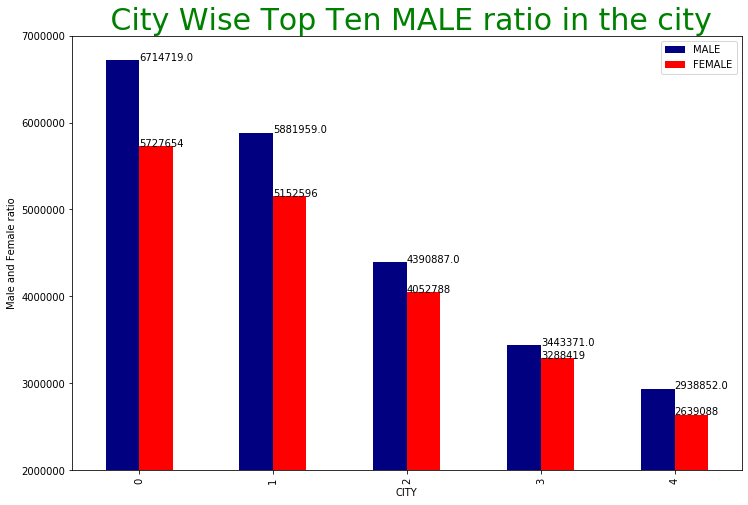

In [31]:
def addlabels(x,y,z):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        plt.text(i,z[i],z[i])
if __name__ == '__main__':
    x = c["CITY"]
    y = c["MALE"]
    z = c["FEMALE"]
    plt.figure(figsize=(10,8))
    df2 = pd.DataFrame(np.array(c[['MALE','FEMALE']]), columns= ['MALE','FEMALE'], index=c.index)
    df2.plot.bar(figsize=(12,8),color = ['navy','red'])
    addlabels(x, y,z)
    plt.title(" City Wise Top Ten MALE ratio in the city", size= 30,color = "green")
    plt.xlabel("CITY")
    plt.ylabel("Male and Female ratio")
    plt.ylim(2000000,7000000)
    plt.xticks(rotation = 90)
    plt.show()

### All about Hyderabad

In [47]:
select_prod = data.loc[data['POPULATION'] == 6731790.0]
select_prod

,CITY,RANK,STATE,POPULATION,SEXRATIO,LITERACY,FEMALE,MALE
250,Hyderabad,4,Andhra Pradesh,6731790.0,955.0,83.26,3288419,3443371.0


## Conclusion

We are using Census 2011 of India for our dataset.
Analyzing our data, we can see that Uttar Pradesh has the highest number of cities and there are 64 cities in Uttar Pradesh.
The highest city in India by population is Mumbai (Maharashtra) and population is 12442373.
The lowest city in India by population is Kupurthala (Panjab) and population is 98916.
The highest city in India by litaracy is Aizawl (Mizoram) and percentage is 98.36%.
The lowest city in India by litaracy is Sambhal (Uttar Pradesh) and percentage is 48.98%.
And we see that the total population of Hyderabad is 6731790 and the literacy percentage is 83.26% and Hyderabad is the 4th most populous city in India according to our data.